In [62]:
import pandas as pd
import numpy as np
from osprey.config import Config
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
all_dfs = []
for i in range(1,6):
    df = Config('seed10-ss20/run{}/config-gp-k2.yaml'.format(i)).trial_results()
    df['run'] = i
    all_dfs.append(df)
total_df = pd.concat(all_dfs)

Loading config file:     seed10-ss20/run1/config-gp-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     seed10-ss20/run2/config-gp-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     seed10-ss20/run3/config-gp-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     seed10-ss20/run4/config-gp-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...
Loading config file:     seed10-ss20/run5/config-gp-k2.yaml...
Loading trials database: sqlite:///osprey-trials.db...


In [64]:
total_df.head()

,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user,run
0,2018-03-05 11:25:55.721503,0c849985bf7e415441f81a9696f05934b44f799d,1970-01-01 00:00:06.464587,compute145.bc4.acrc.priv,1,2.552272,2.551867,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k3,2018-03-05 11:25:49.256916,SUCCEEDED,"[2.5578510835960913, 2.551176441274483, 2.5547...",None,"[2.544265138138719, 2.5535643100248273, 2.5496...",ra15808,1
1,2018-03-05 11:25:56.519129,cce3e750d326946676f224f6959eba09633d1246,1970-01-01 00:00:07.208664,compute523.bc4.acrc.priv,2,2.945052,2.946567,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k4,2018-03-05 11:25:49.310465,SUCCEEDED,"[2.9376922136626673, 2.944668442659632, 2.9463...",None,"[2.9528450392699233, 2.9475743053090455, 2.945...",ra15808,1
2,2018-03-05 11:25:57.917156,2634ddef4c395f9ef9e492ca0e15559d693e491e,1970-01-01 00:00:08.606673,compute523.bc4.acrc.priv,3,2.941148,2.961617,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k6,2018-03-05 11:25:49.310483,SUCCEEDED,"[2.947244490820191, 2.953311513574861, 2.94634...",None,"[2.960046927663368, 2.956704432886874, 2.95838...",ra15808,1
3,2018-03-05 11:26:07.602481,cd7a7a248e910633cc054c242b44d2f2ed164ca9,1970-01-01 00:00:18.292025,compute523.bc4.acrc.priv,4,2.929248,2.955749,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k5,2018-03-05 11:25:49.310456,SUCCEEDED,"[2.9296766776836662, 2.926001637907767, 2.9361...",None,"[2.9698434983618878, 2.9735877756681486, 2.961...",ra15808,1
4,2018-03-05 11:25:57.119157,8f3a57c4b823927736ccf004031306a170b740f9,1970-01-01 00:00:07.509663,compute145.bc4.acrc.priv,5,1.931479,1.931723,"[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","[6400, 6400, 6400, 6400, 6400, 6400, 6400, 640...","{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,2018-03-05 11:25:49.609494,SUCCEEDED,"[1.9317433590441784, 1.9313572360344111, 1.930...",None,"[1.9319214177479958, 1.9322844171478115, 1.932...",ra15808,1


In [65]:
df = total_df.loc[:, ['parameters', 'project_name', 'test_scores', 'train_scores', 'run', 'started']]

In [66]:
df.head()

,parameters,project_name,test_scores,train_scores,run,started
0,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k3,"[2.5578510835960913, 2.551176441274483, 2.5547...","[2.544265138138719, 2.5535643100248273, 2.5496...",1,2018-03-05 11:25:49.256916
1,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k4,"[2.9376922136626673, 2.944668442659632, 2.9463...","[2.9528450392699233, 2.9475743053090455, 2.945...",1,2018-03-05 11:25:49.310465
2,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k6,"[2.947244490820191, 2.953311513574861, 2.94634...","[2.960046927663368, 2.956704432886874, 2.95838...",1,2018-03-05 11:25:49.310483
3,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k5,"[2.9296766776836662, 2.926001637907767, 2.9361...","[2.9698434983618878, 2.9735877756681486, 2.961...",1,2018-03-05 11:25:49.310456
4,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9317433590441784, 1.9313572360344111, 1.930...","[1.9319214177479958, 1.9322844171478115, 1.932...",1,2018-03-05 11:25:49.609494


In [67]:
df['step'] = 0
df.sort_values(ascending=True, by='started', inplace=True)

In [68]:
df['step'] = df.groupby([ 'run','project_name']).cumcount(ascending=True)
df['step'] += 1

In [69]:
df.loc[(df['project_name']=='k2') & (df['run']==2), :].head(10)

,parameters,project_name,test_scores,train_scores,run,started,step
0,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9297876815245745, 1.9302685479180348, 1.926...","[1.9322469850606996, 1.9327846587492556, 1.933...",2,2018-03-05 11:25:49.270878,1
3,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9304974766502832, 1.9303396079163524, 1.933...","[1.9331248164599308, 1.9329269746844657, 1.930...",2,2018-03-05 11:25:56.420770,2
10,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9300078038945516, 1.931947489606919, 1.9306...","[1.931687646251905, 1.9318584103789902, 1.9322...",2,2018-03-05 11:26:09.436806,3
15,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.930883319593535, 1.9319377888575011, 1.9315...","[1.9328795782999197, 1.9318086835567838, 1.932...",2,2018-03-05 11:26:19.219201,4
19,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9297164746926256, 1.9324575529690078, 1.931...","[1.9325498283060072, 1.931165809091723, 1.9315...",2,2018-03-05 11:26:28.445029,5
22,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9322774135012566, 1.9310094763544998, 1.929...","[1.9315193471478134, 1.9327968614452284, 1.933...",2,2018-03-05 11:26:38.389374,6
30,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9313136199294156, 1.9316498214035172, 1.929...","[1.9319059437520216, 1.9316227474364802, 1.932...",2,2018-03-05 11:26:52.595059,7
33,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9301318595364658, 1.930944128821345, 1.9315...","[1.9336137023081836, 1.9320862568006851, 1.932...",2,2018-03-05 11:26:59.241033,8
37,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9310206827170369, 1.930120883677085, 1.9316...","[1.9327693778042765, 1.9335772602982106, 1.932...",2,2018-03-05 11:27:06.647347,9
45,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9316387502298578, 1.9320308353119429, 1.930...","[1.9321529305897065, 1.9317799622339407, 1.933...",2,2018-03-05 11:27:19.638072,10


In [70]:
df['k'] = df['parameters'].apply(lambda x: int(x['msm__score_k']))

In [71]:
df['m'] = df['parameters'].apply(lambda x: int(x['cluster__n_bins_per_feature']))

In [72]:
df['MCV_train'] = df['train_scores'].apply(lambda x: np.mean(x))
df['MCV_test'] = df['test_scores'].apply(lambda x: np.mean(x))

In [73]:
df.head()

,parameters,project_name,test_scores,train_scores,run,started,step,k,m,MCV_train,MCV_test
0,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k5,"[2.9493496497088008, 2.9488694763351297, 2.944...","[2.9538761577832533, 2.9557266246252594, 2.960...",4,2018-03-05 11:25:49.256887,1,5,477,2.955516,2.945860
0,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k3,"[2.5578510835960913, 2.551176441274483, 2.5547...","[2.544265138138719, 2.5535643100248273, 2.5496...",1,2018-03-05 11:25:49.256916,1,3,131,2.551867,2.552272
0,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k3,"[2.5491478771684912, 2.5489907326978845, 2.549...","[2.553242042382461, 2.555348732442912, 2.55608...",5,2018-03-05 11:25:49.265296,1,3,881,2.553550,2.550853
0,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k2,"[1.9297876815245745, 1.9302685479180348, 1.926...","[1.9322469850606996, 1.9327846587492556, 1.933...",2,2018-03-05 11:25:49.270878,1,2,70,1.931947,1.930875
0,"{'msm__dt_traj': '1 step', 'msm__count_mode': ...",k4,"[2.9338057270653164, 2.936064764599387, 2.9411...","[2.9439355799286124, 2.938664163727457, 2.9373...",3,2018-03-05 11:25:49.271378,1,4,43,2.940119,2.938131


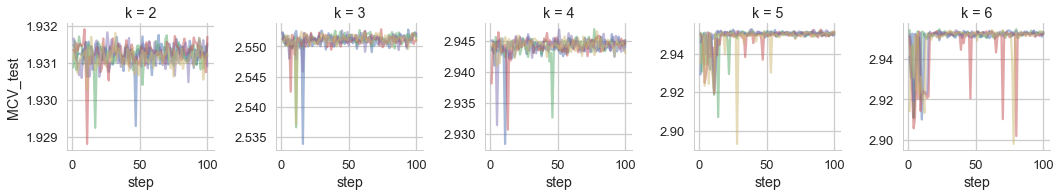

In [74]:
with sns.plotting_context('talk', font_scale=1):
    g = sns.FacetGrid(data=df, col='k', hue='run', sharey='col')
    g.map(plt.plot, 'step', 'MCV_test', alpha=0.5)

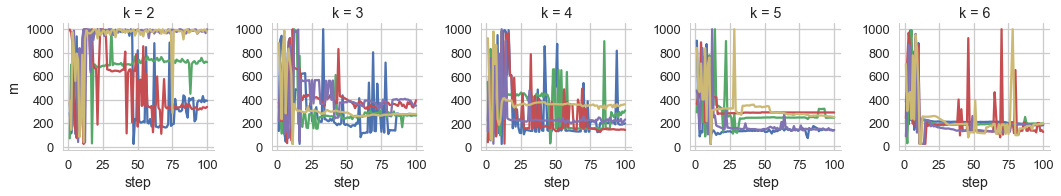

In [75]:
with sns.plotting_context('talk', font_scale=1):
    g = sns.FacetGrid(data=df, col='k', hue='run', sharey='col')
    g.map(plt.plot, 'step', 'm')

## Single run and single k results

In [76]:
k = 4
run = 1
df.sort_values(by='step', inplace=True)


In [77]:
df.dtypes

parameters       object
project_name     object
test_scores      object
train_scores     object
run               int64
started          object
step              int64
k                 int64
m                 int64
MCV_train       float64
MCV_test        float64
dtype: object

In [108]:
import GPy
from scipy.stats import norm
from matplotlib.ticker import StrMethodFormatter

def fit_gp(x, y):
    kernel = GPy.kern.Matern52(input_dim=1)
    m = GPy.models.GPRegression(x,y,kernel)
    _ = m.optimize_restarts(num_restarts = 20, verbose=False)
    return m

def get_ei(model, x):
    y_mean, y_var = model.predict(x)
    y_std = np.sqrt(y_var)
    y_best = model.Y.max(axis=0)
    z = (y_mean - y_best)/y_std
    result = y_std*(z*norm.cdf(z) + norm.pdf(z))
    return result

def get_prediction(m, x):
    mu, var = m.predict(x)
    ei = get_ei(m, x)
    
    lb = (mu - 1.96*np.sqrt(var)).reshape(-1)
    ub = (mu + 1.96*np.sqrt(var)).reshape(-1)
    x = x.reshape(-1) 
    
    return x, mu, lb, ub, ei

def plot_gp(ax, x, X, y, mu, lb, ub,log=False):
    if log: 
        x = np.exp(x)
        X = np.exp(X)
#         ax.set_xscale('log')
        
    ax.plot(x, mu, label='Mean')
    ax.scatter(X,y, label='Data', c='k', marker='x', alpha=1)
    
    ax.fill_between(x,lb, ub, alpha=0.4, label='95% CI')
    ax.legend()
#     ax.set_ylabel('VAMP-E')
    return ax

def plot_rel_ei(ax, ei, x, mu, log=False):
    if log:
        x = np.exp(x)
#         ax.set_xscale('log')      
    ei = ei/np.max(ei)
    ax.plot(x,ei)
    kwargs = dict(c='k', s=50)
    ax.scatter(x[np.argmax(ei)], np.max(ei), label='$m^{next}: %d $' % int(x[np.argmax(ei)]), 
              **kwargs, marker='x')
    ax.scatter(x[np.argmax(mu)], ei[np.argmax(mu)], label='$m^{best}: %d $' % int(x[np.argmax(mu)]), 
              **kwargs, marker='o')
    ax.set_xlabel('m')  
    ax.set_ylim(0,1.5)
#     ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1e}'))
#     ax.set_ylabel('Relative\nExpected Improvement')
    ax.legend(loc='best', fancybox=True, framealpha=0.5)
    return ax

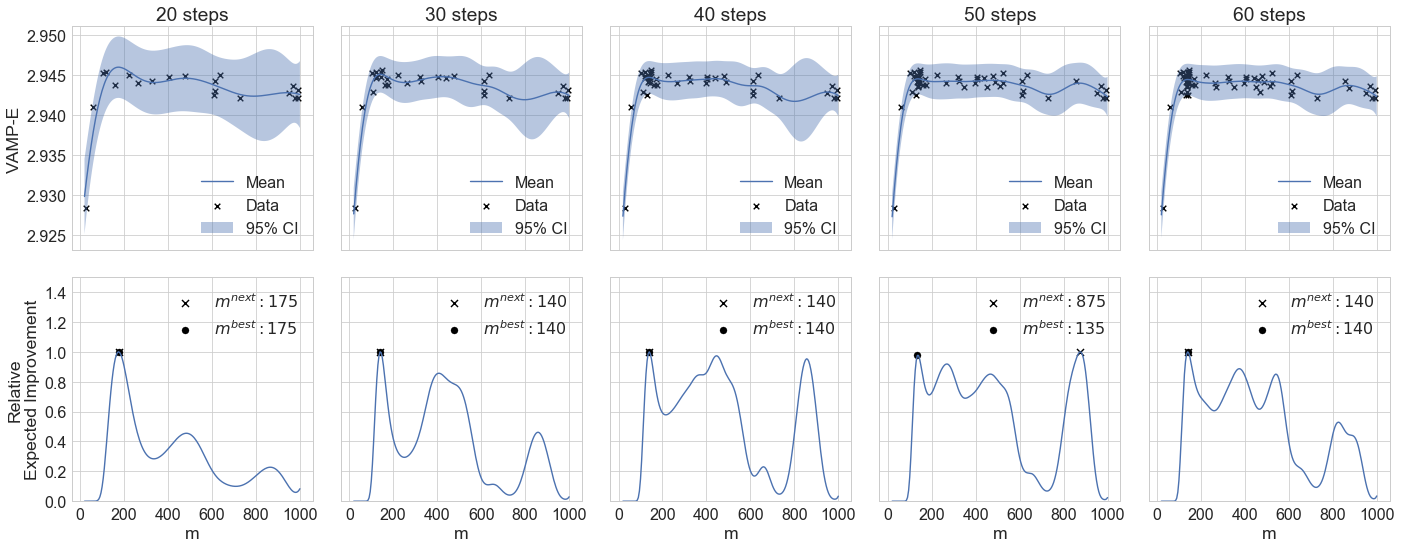

In [111]:
steps = np.arange(20, 61, 10)
with sns.plotting_context('paper', font_scale=2):
    sns.set_style('whitegrid')
    
    fig, axes = plt.subplots(2, len(steps), sharey='row', sharex=True, figsize=(20,8))
    
    for i, step in enumerate(steps):
        idx = (df['run']==run) & (df['k']==k) & (df['step']<= step)
        X = df.loc[idx, 'm'].values[:, np.newaxis]
        y = df.loc[idx, 'MCV_test'].values[:, np.newaxis]
        m = fit_gp(X, y)
        x = np.arange(20, 1001, 5)[:, np.newaxis]
        x, mu, lb, ub, ei = get_prediction(m, x)
        
        plot_gp(axes[0,i], x, X, y, mu, lb, ub, log=False)
        plot_rel_ei(axes[1,i], ei, x, mu, log=False)
        axes[0,i].set_title('{} steps'.format(step))
        
    axes[0,0].set_ylabel('VAMP-E')
    axes[1,0].set_ylabel('Relative\nExpected Improvement')
    
    plt.tight_layout()
    plt.savefig('../figures/smbo_k{0}_run{1}.pdf'.format(k, run))    
        


In [134]:
steps = np.arange(10,61,1)
best_m = np.zeros(len(steps))
best_mu = np.zeros(len(steps))
for i, step in enumerate(steps):
    print(i)
    idx = (df['run']==run) & (df['k']==k) & (df['step']<= step)
    X = df.loc[idx, 'm'].values[:, np.newaxis]
    y = df.loc[idx, 'MCV_test'].values[:, np.newaxis]
    m = fit_gp(X, y)
    x = np.arange(20, 1001, 1)[:, np.newaxis]
    x, mu, lb, ub, ei = get_prediction(m, x)
    best_m[i] = x[np.argmax(mu)]
    best_mu[i] = np.max(mu)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


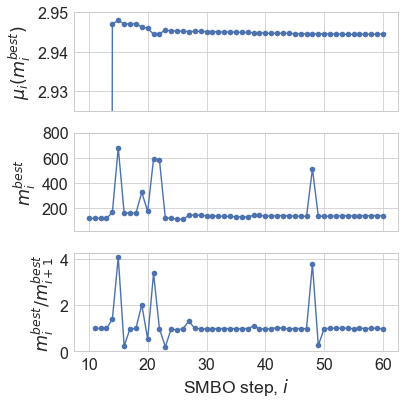

In [144]:
with sns.plotting_context('paper', font_scale=2):
    fig, axes = plt.subplots(3, sharex=True, figsize=(6,6))
    start = 0


    axes[0].plot(steps[start:], best_mu[start:], label='$\mu(m^{best})$', marker='o')
    axes[0].set_ylim(2.925,2.950)
    axes[0].set_ylabel('$\mu_i(m_i^{best})$')
    
    axes[1].plot(steps[start:], best_m[start:], label='$m^{best}$', marker='o')
    axes[1].set_ylim(20,800)
    axes[1].set_ylabel('$m^{best}_i$')    
    
    axes[2].plot(steps[start+1:], best_m[start+1:]/best_m[start:-1], marker='o')
    axes[2].set_ylabel('$m^{best}_i/m^{best}_{i+1}$')
    axes[2].set_xlabel('SMBO step, $i$')
    plt.tight_layout()
    plt.savefig('../figures/smbo_converge_k{0}_run{1}.pdf'.format(k, run))
    

In [146]:
best_m

array([120., 120., 120., 120., 167., 679., 164., 161., 161., 326., 175.,
       591., 582., 123., 121., 112., 111., 146., 146., 144., 141., 139.,
       138., 136., 135., 133., 132., 131., 144., 143., 139., 137., 142.,
       142., 139., 138., 137., 136., 512., 138., 137., 137., 139., 140.,
       141., 139., 141., 140., 141., 142., 140.])